# Present the same data multiple ways

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### About the Data

#### This data is from Kaggle.com. It was a competition to answer:
#### "Why are our best and most experienced employees leaving prematurely?"

https://www.kaggle.com/ludobenistant/hr-analytics

In [2]:
#Load Dataset
data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Choose one variable and plot that variable four different ways

Will use Average Monthly Hours

#### Distribution Plot

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


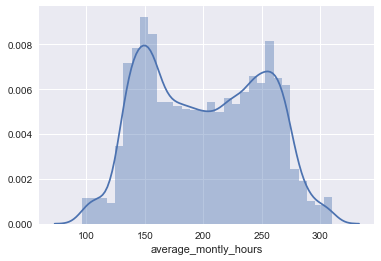

In [17]:
ax = sns.distplot(data['average_montly_hours'])

This distribution plot shows how the data is distributed. As we can see, the distribution is not normal and has two distinct humps.

Pro:
1. Can see how the data is distributed at a glance.

Con:
1. Can be hard to interpret what the y axis is.

#### Strip Plot

These plots are typically plotted with a categorical variable as well. Its similiar to a box or violin plot where it shows the spread of the data.

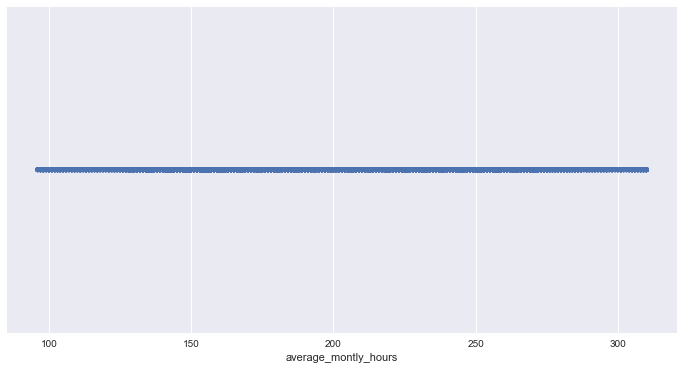

In [28]:
plt.figure(figsize=(12,6))
sns.stripplot(data['average_montly_hours'], orient="h")

Pro:
1. When it works, can see how the data is spread. 

Con:
1. As you can see, the current graph doesnt tell us much information. It just looks like a straight line.

#### Box Plot

A box plot shows the distribution of data by quartiles and any outliers. As you can see, there are no outliers in the average monthly hours.

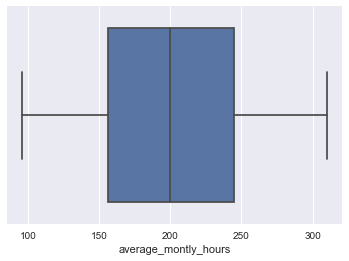

In [16]:
sns.boxplot(data['average_montly_hours'])

Pro:
1. I love box plots. Can easily see the median(50% quartile) and the lower and upper quartiles.
2. When used with categorical variables, can compare the distributions.

Cons:
1. Doesnt show a lot of information beyond the quartiles. The design of the plot is show data around the center.

#### Letter value plots

They are similiar to box plots, but they really highlight the outliers better than box plots do.

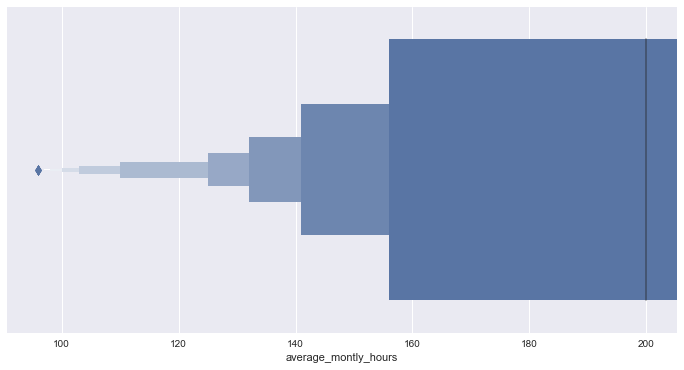

In [29]:
plt.figure(figsize=(12,6))
sns.lvplot(data['average_montly_hours'])

### Choose one continuous variable and one categorical variable, and plot them six different ways.

#### Box Plot

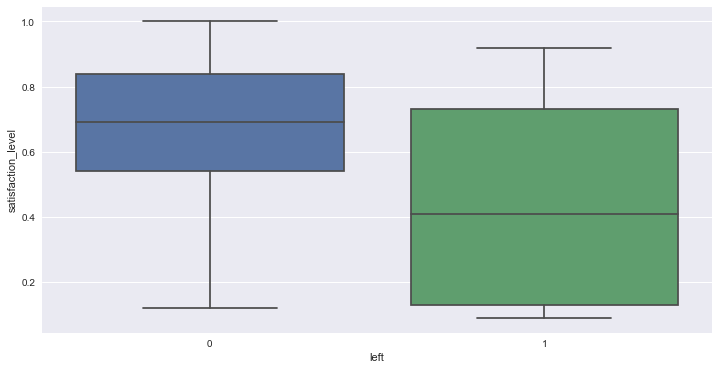

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(y=data['satisfaction_level'], x=data['left'])


#### Violin Plot

This is similiar to a box plot, but instead of plotting actual datapoints, it plots the kernal density estimation of the underlying distribution.

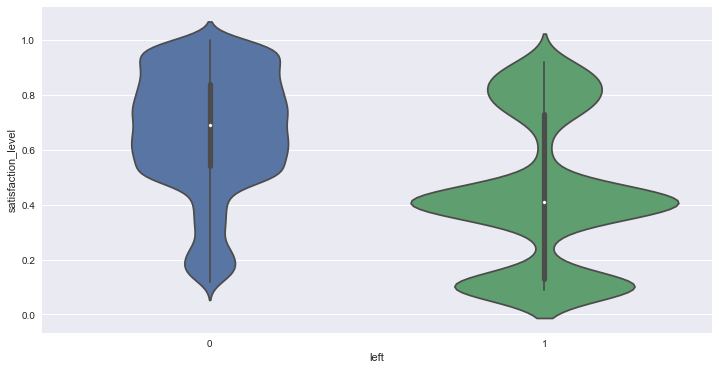

In [32]:
plt.figure(figsize=(12,6))
sns.violinplot(y=data['satisfaction_level'], x=data['left'])

Pro:
1. Good for seeing the "shape" of the data

Con:
1. Can be harder to interpret for layman.

#### Letter Value Plots

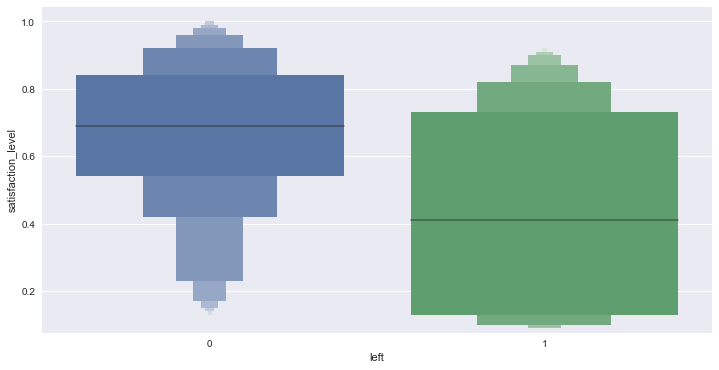

In [33]:
plt.figure(figsize=(12,6))
sns.lvplot(y=data['satisfaction_level'], x=data['left'])

#### Point Plot

Shows point estimates and confidence intervals. It represents an estimate of central tendency for a numeric variable by the position of scatter plot points.

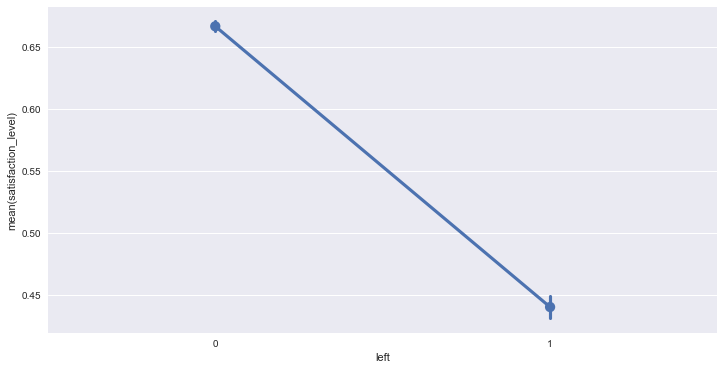

In [34]:
plt.figure(figsize=(12,6))
sns.pointplot(y=data['satisfaction_level'], x=data['left'])

Pro:
1. They can be more useful than bar plots because it focuses on comparisons between different levels of different categorical variables. 

Con:
1. Only shows the mean, when there can potentially be more interesting data to show.

#### Count Plot

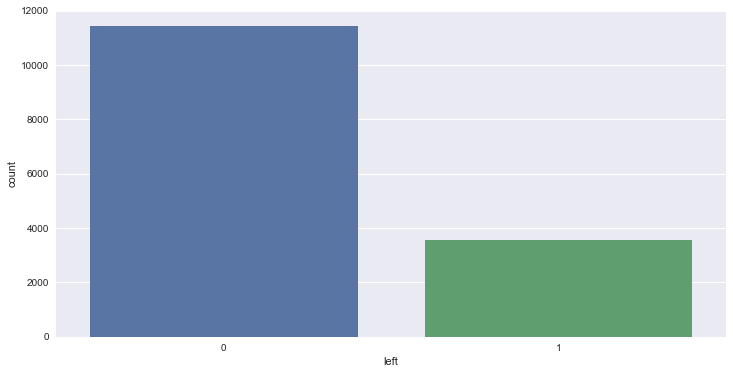

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data['left'])

#### Factor Plot

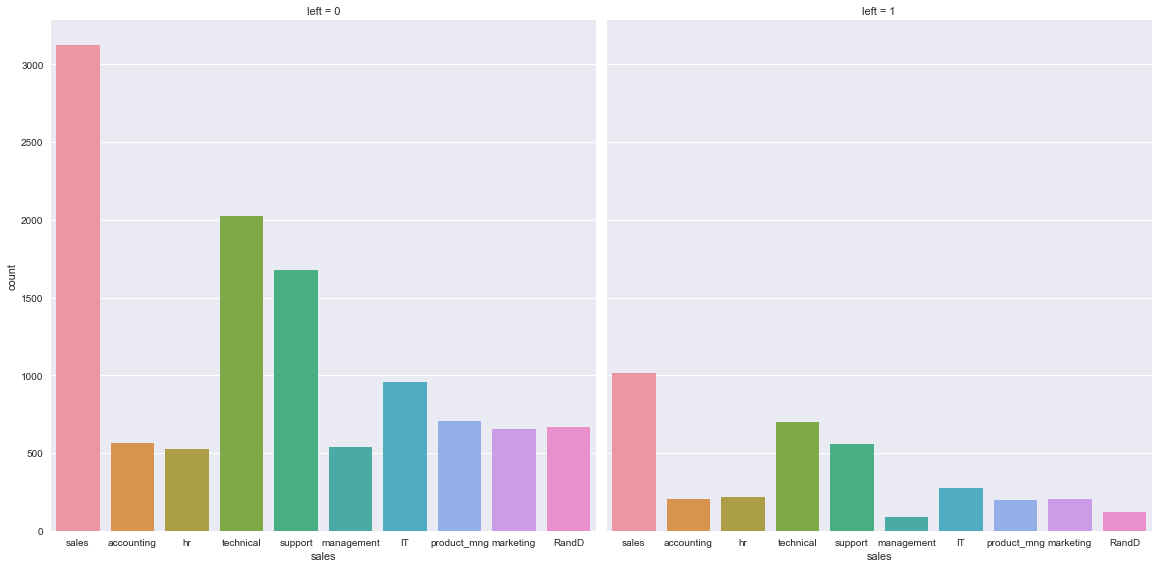

In [45]:
plt.figure(figsize=(16,8))
sns.factorplot(x="sales", col="left", data=data, kind="count", size=8)

Pro:
1. Factor plots allows you to split the graphs and do comparisons on the count.

### Challenge:

Create one master plot that gives insight into the variables and their interrelationships, including:

1. Probability distributions
2. Bivariate relationships
3. Whether the distributions or the relationships vary across groups

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


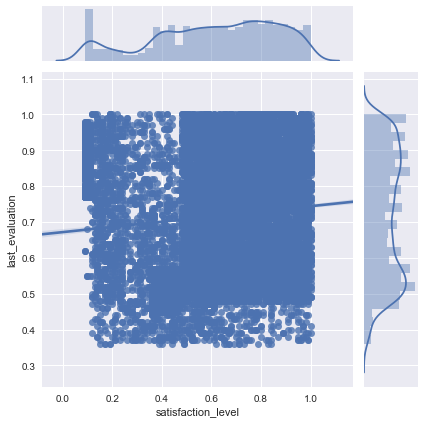

In [46]:
g = sns.JointGrid(x='satisfaction_level', y='last_evaluation', data=data)
g = g.plot(sns.regplot, sns.distplot)